# Importing dataset and libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# use pandas to read data from csv
df = pd.read_csv(r"C:\MiniProject\survey_results_public1.csv")

In [3]:
#Displays first 5 rows of dataset
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
# Remove all columns other than Country, EdLevel, Employment, ConvertedComp.
df = df[["Country", "EdLevel", "YearsCodePro","Employment", "ConvertedComp"]]

# Change column name to Salary then check results.
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [5]:
# Remove row entries where values from Salary are null.
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master's degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor's degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [6]:
# Check more information of the dataset Object->string
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25688 entries, 7 to 45833
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       25688 non-null  object 
 1   EdLevel       25267 non-null  object 
 2   YearsCodePro  25586 non-null  object 
 3   Employment    25661 non-null  object 
 4   Salary        25688 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


# Clean the dataset by removing missing values and other things

In [7]:
# Drop rows in  which one of those col is not a number
# Drop all row entries that contain any null values.

df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [8]:
# Only keep full-time employment row entries, then delete the employment column.
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22212 entries, 7 to 45833
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       22212 non-null  object 
 1   EdLevel       22212 non-null  object 
 2   YearsCodePro  22212 non-null  object 
 3   Salary        22212 non-null  float64
dtypes: float64(1), object(3)
memory usage: 867.7+ KB


In [9]:
# Find the number of entries per country so that the countries without enough data can be removed.
df['Country'].value_counts()

United States     5458
India             1923
United Kingdom    1686
Germany           1430
Canada             853
                  ... 
Turkmenistan         1
Bahamas              1
Guinea               1
Namibia              1
Senegal              1
Name: Country, Length: 147, dtype: int64

In [10]:
# Creates a minimun cutoff, so that anything below minimum is moved to "Other" group.
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
# Call the above method to only keep the countries with entries above 400, and move the countries below 400 to "Other".
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other             7106
United States     5458
India             1923
United Kingdom    1686
Germany           1430
Canada             853
Brazil             737
France             712
Spain              499
Netherlands        487
Australia          483
Italy              431
Poland             407
Name: Country, dtype: int64

# Visualize dataset using boxplot

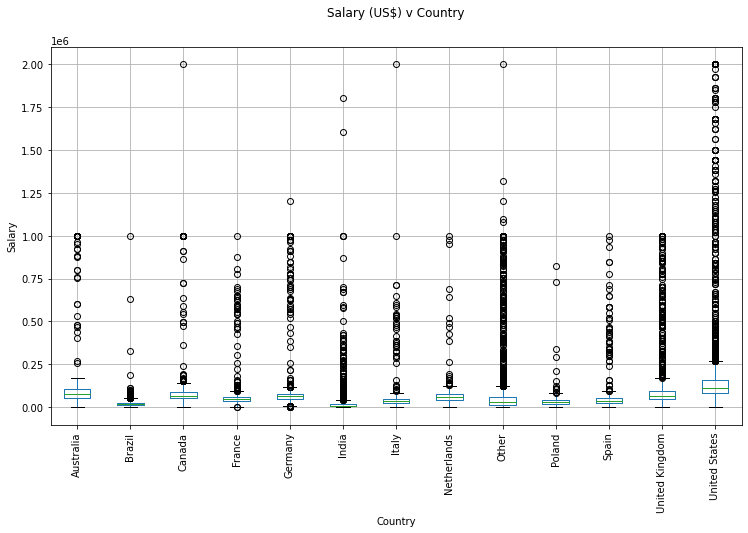

In [12]:
# Create box plot with the filtered salary data by country of residence.
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
#short the salary
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other'] #Drop other

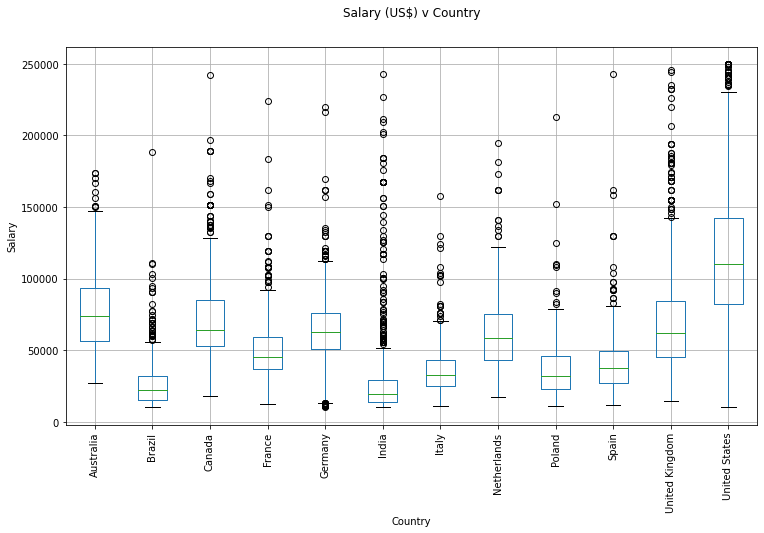

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Find unique entries concerning years of professional experience.
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [16]:
# Method to change "More than 50 years" & "Less than 1 year" to 50 to represent 50 or above and 0.5 to represent less than 1 year.
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [17]:
# Check that experience entries have been altered.
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [18]:
# Find unique education entries.
df["EdLevel"].unique()

array(["Bachelor's degree (B.A., B.S., B.Eng., etc.)",
       "Master's degree (M.A., M.S., M.Eng., MBA, etc.)",
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [19]:
# Method that further sorts the education level into 4 primary categories.
def clean_education(x):
    if "Bachelor's degree" in x:
        return "BTech"
    if "Primary/elementary school" in x:
        return "BA"
    if "Secondary school" in x:
        return "BSC"
    if "Master's degree" in x:
        return "Master's degree"
    #if 'Professional degree' in x or 'Other doctoral' in x:
     #   return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [20]:
# Check changes.
df["EdLevel"].unique()

array(['BTech', "Master's degree", 'Less than a Bachelors', 'BSC', 'BA'],
      dtype=object)

In [21]:
# Convert String values of 'EdLevel' to numbers. model cannot understand string so
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([2, 4, 3, 1, 0])

In [22]:
# Entries representing as String values must be converted to numbers, so that they can be utilized by the system.
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([11, 10,  9,  7,  4,  2,  6,  1,  3,  5,  8,  0])

In [23]:
#Split columns
X = df.drop("Salary", axis=1) #features
y = df["Salary"] #labels

# Use linear Regression,DecisionTree,RandomForest Regression for training and testing and get errors

In [24]:
# Data will first be tested with linear regression.
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(X)

In [26]:
# To evaluate how good our model performs
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))



In [27]:
error

39087.59507274314

In [28]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred = dec_tree_reg.predict(X)

In [30]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,530.15


In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [32]:
y_pred = random_forest_reg.predict(X)

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$29,611.12


In [34]:
# Import grid search and use the data with decision tree.
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth} #Use different parameter for decisiontree

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [35]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,576.72


In [36]:
X

,Country,EdLevel,YearsCodePro
7,11,2,13.0
9,10,4,4.0
10,10,2,2.0
11,9,3,7.0
12,7,1,20.0
...,...,...,...
45807,0,2,20.0
45811,2,4,5.0
45815,5,4,5.0
45817,5,4,5.0


In [37]:
# country, edlevel, yearscode
# Create array for 'x' that includes data points 'Country', 'EdLevel', and 'YearsCodePro'.
# Used as an example for how input data will be collected by the web app user and tested by the program.
X = np.array([["United States", "Master's degree", 15 ]])
X

array([['United States', "Master's degree", '15']], dtype='<U15')

In [38]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[11.,  4., 15.]])

In [39]:
y_pred = regressor.predict(X)
y_pred

C:\Users\Samikasha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([134320.48717949])

# Save model

In [40]:
# Import pickle to convert to byte stream.
import pickle

In [41]:
# Using pickle, model can be saved in directory.

data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('c:\MiniProject\saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [42]:
# Uses pickle to load the data from the model.
with open('c:\MiniProject\saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [43]:
# Final prediction model for the web app.
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\Samikasha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([134320.48717949])